In [1]:
import pandas as pd

df = pd.read_csv("./credit_risk_train.csv")  # 读取数据文件
df.head()

,BILL_1,BILL_2,BILL_3,BILL_4,BILL_5,BILL_6,AGE,SEX,EDUCATION,MARRIAGE,RISK
0,0,0,0,0,0,0,37,Female,Graduate School,Married,LOW
1,8525,5141,5239,7911,17890,10000,25,Male,High School,Single,HIGH
2,628,662,596,630,664,598,39,Male,Graduate School,Married,HIGH
3,4649,3964,3281,934,467,12871,41,Female,Graduate School,Single,HIGH
4,46300,10849,8857,9658,9359,9554,55,Female,High School,Married,HIGH


In [9]:
# 独热编码将类别型特征转换为数值型特征
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

df.RISK = df.RISK.replace({"LOW": 0, "HIGH": 1})  # 将分类标签替换为数值，方便后面计算

train_data = df.iloc[:, :-1]  # 特征数据列

# 将非数值的列，column 和 值进行组合，并拆分处单独的列，只有两个组合则结果为：两列、Ture / False
train_data = pd.get_dummies(train_data)  # 对特征数据进行独热编码
train_data = scale(train_data)  # 规范化处理
train_target = df["RISK"]  # 目标数据列

# 划分数据集，训练集占 70%，测试集占 30%
X_train, X_test, y_train, y_test = train_test_split(
    train_data, train_target, test_size=0.3, random_state=0
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14000, 16), (6000, 16), (14000,), (6000,))

In [10]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver="lbfgs")  # 定义逻辑回归模型
model.fit(X_train, y_train)  # 使用训练数据完成模型训练

LogisticRegression()

In [11]:
# 在二分类问题中，我们常常会定义正类和负类，就可以给出实际类别（行名）和预测类别（列名）的混淆矩阵
# 将结果拆分成 TP 、TN 、FP 、FN 四种情况
# 所以有准确率公式： (TP + TN) / (TP + FP + TN + FN)
y_pred = model.predict(X_test)  # 输入测试集特征数据得到预测结果
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [12]:
import numpy as np


def get_accuracy(test_labels, pred_lables):
    # 准确率计算公式，根据公式 2 实现
    correct = np.sum(test_labels == pred_lables)  # 计算预测正确的数据个数
    n = len(test_labels)  # 总测试集数据个数
    acc = correct / n
    return acc

0.7678333333333334

0.7678333333333334

In [13]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)  # 传入真实类别和预测类别

0.7678333333333334

In [14]:
model.score(X_test, y_test)  # 传入测试数据特征和类别

0.7678333333333334

In [15]:
from sklearn.metrics import precision_score

precision_score(y_test, y_pred)

0.7678333333333334

In [16]:
from sklearn.metrics import recall_score

recall_score(y_test, y_pred)

1.0

In [17]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred)

0.8686716319411709

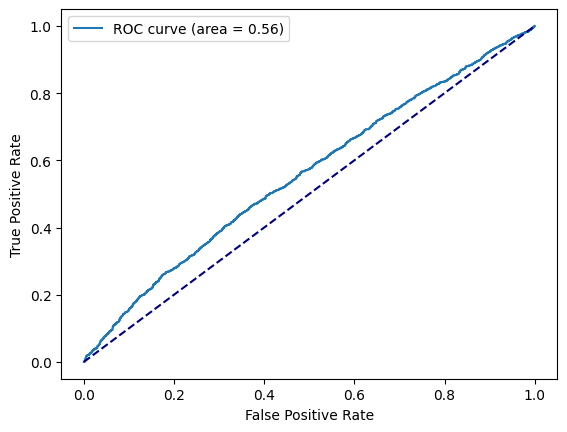

In [18]:
from matplotlib import pyplot as plt

%matplotlib inline

from sklearn.metrics import roc_curve
from sklearn.metrics import auc

y_score = model.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()